# Forcing and response

The next level of analysis is often to relate a record (or several of them) to their forcing. A classic example are $\delta^{18}O$ records from Chinese speleothems, broadly interpreted as reflecting continental-scale monsoon circulations, though somewhat vaguely defined (see [Hu et al , 2019](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2019PA003741)).  

In this notebook we reproduce Fig 2b of Hu et al. 2019, and

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pyleoclim as pyleo
import lipd
pyleo.set_style('web')
%matplotlib inline

## Loading the speleothem records and mapping them

In [5]:
# study sites
sites=['Dongge','Heshang','Jiuxian','Sanbao','Lianhua','Tianmen']

In [6]:
# names of stalagmites used for each site
enames={}
enames['Jiuxian']='C9961'
enames['Sanbao']='SB43'
enames['Heshang']='HS4'
enames['Lianhua']='LH-2'
enames['Dongge']='DA'
enames['Tianmen']='TM-18a'

In [10]:
geo = {}
var_all = {}
for site in sites:
    ld=lipd.readLipd('../data/'+site+'.lpd')
    lipd_m = lipd.getMetadata(ld)
    #read lat,lon
    geo[site]={}
    geo[site]['lat']=lipd_m['geo']['geometry']['coordinates'][1]
    geo[site]['lon']=lipd_m['geo']['geometry']['coordinates'][0]

    entity=enames[site]
    var_all[site]={}

    # read variables in paleoTable
    ts = lipd.extractTs(ld, whichtables="meas", mode="paleo")
    new_ts = lipd.filterTs(ts, 'paleoData_notes == '+entity)

    for var in ['depth','age','d18o']:
        var_tmp=lipd.filterTs(new_ts,'paleoData_variableName == '+var)
        var_all[site][var]=var_tmp[0]['paleoData_values']

    # read variables in chronTable
    ts = lipd.extractTs(ld, whichtables="meas", mode="chron")
    new_ts = lipd.filterTs(ts, 'chronData_notes == '+entity)

    for var in ['depth_dating','corr_age','corr_age_uncert']:
        var_tmp=lipd.filterTs(new_ts,'chronData_variableName == '+var)
        var_all[site][var]=var_tmp[0]['chronData_values']

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Dongge.lpd
Finished read: 1 record
extracting paleoData...
extracting: Dongge.Wang.2005
Created time series: 14 entries
Found 14 matches from 14 columns
Found 1 matches from 14 columns
Found 1 matches from 14 columns
Found 1 matches from 14 columns
extracting chronData...
extracting: Dongge.Wang.2005
Created time series: 14 entries
Found 14 matches from 14 columns
Found 1 matches from 14 columns
Found 1 matches from 14 columns
Found 1 matches from 14 columns
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Heshang.lpd
Finished read: 1 record
extracting paleoData...
extracting: Heshang.Hu.2008
Created time series: 14 entries
Found 14 matches from 14 columns
Found 1 matches from 14 columns
Found 1 matches from 14 columns
Found 1 matches from 14 columns
extracting chronData...
extracting: Heshang.Hu.2008
Created time series: 14 entries
Found 14 matches from 14 columns
Fou

## TODO: map all these records using Pyleoclim



In [17]:
cmap=plt.get_cmap('Dark2')


## Constructing insolation curves

Speleothem records from Asia are often compared to summertime insolation (though the latitude of this field is not always consistently chosen). To compute the insolation, we make use of the excellent package [climlab](https://climlab.readthedocs.io/en/latest/index.html) by Brian Rose.  Lucky you, the package is already installed on this JupyterHub, so all we have to do is invoke it.

In [22]:
from climlab import constants as const
from climlab.solar.orbital import OrbitalTable
from climlab.solar.insolation import daily_insolation

kyears = np.linspace(-11, 0, 1001 ) # thousands of years
# subset of orbital parameters for specified time
orb = OrbitalTable.interp(kyear=kyears)

# generate JJA insolation for all sites
insol={}
for site in sites:
    lat=geo[site]['lat']
    days = np.linspace(0, const.days_per_year, 365)
    Q = daily_insolation([lat], days, orb)
    # Julian days 152-243 are JJA
    insol[site]= np.mean(Q[:,151:243], axis=1)

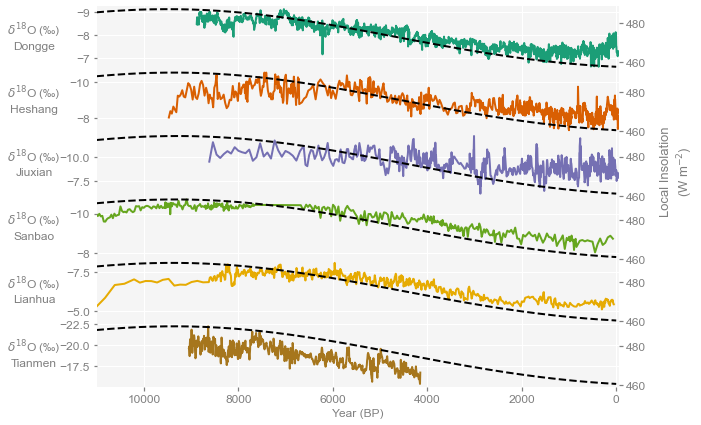

In [23]:
fig, axs = plt.subplots(6, 1, figsize=(10, 7),sharex=True)
fig.subplots_adjust(hspace=0.001)

n = len(sites)
i=0
for site in sites:
    axs[i].plot(var_all[site]['age'],var_all[site]['d18o'],color=cmap(i/n))
    ax2 = axs[i].twinx()
    ax2.plot(np.linspace(11000, 0, 1001),insol[site],color = 'Black',linestyle='dashed')
    if i==2:
        ax2.set_ylabel('Local Insolation\n'+r'(W m$^{-2}$)',rotation=90,fontsize=13)
    ax2.yaxis.set_label_coords(1.08, 0.4)
    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.grid(False)
    axs[i].set_xlabel('Year (BP)')
    axs[i].set_ylabel(u'$\delta^{18}$O (\u2030)'+'\n'+site,rotation=0,fontsize=12)
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    axs[i].set_xlim(-50,11000)
    #start, end = axs[i].get_ylim()
    #axs[i].yaxis.set_ticks(np.arange(start, end, 2))
    axs[i].invert_xaxis()
    axs[i].invert_yaxis()
    axs[i].yaxis.set_label_coords(-0.12, 0.3)
    i = i+1
plt.subplots_adjust(right=0.85)   
#fig.savefig('Chinese_speleothems_Holocene.pdf',dpi=300,bbox_inches='tight')

## Orbital coherence

We now focus on the Sanbao record and its relationship to insolation.





In [26]:
d=pyleo.Lipd('../data/Sanbao.lpd')
v=d.to_tso()
ts=pyleo.LipdSeries(v)

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Sanbao.lpd
Finished read: 1 record
extracting paleoData...
extracting: Sanbao.Dong.2010
Created time series: 14 entries
0 :  Sanbao.Dong.2010 :  depth
1 :  Sanbao.Dong.2010 :  age
2 :  Sanbao.Dong.2010 :  d18o
3 :  Sanbao.Dong.2010 :  <variable 4>
4 :  Sanbao.Dong.2010 :  <variable 5>
5 :  Sanbao.Dong.2010 :  <variable 6>
6 :  Sanbao.Dong.2010 :  <variable 7>
7 :  Sanbao.Dong.2010 :  <variable 8>
8 :  Sanbao.Dong.2010 :  <variable 9>
9 :  Sanbao.Dong.2010 :  <variable 10>
10 :  Sanbao.Dong.2010 :  <variable 11>
11 :  Sanbao.Dong.2010 :  <variable 12>
12 :  Sanbao.Dong.2010 :  <variable 13>
13 :  Sanbao.Dong.2010 :  <variable 14>


Enter the number of the variable you wish to use:  2


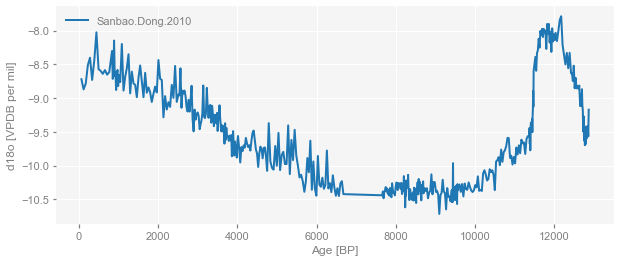

(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:xlabel='Age [BP]', ylabel='d18o [VPDB per mil]'>)

In [27]:
ts.plot()